Loaded from permuted data
training set loaded
pre-trained VAE loaded
test set (rotating_half) loaded
Loaded from permuted data
1000
1
2
3
4
5
6
7
8
9
10
11
1000
0 torch.Size([1, 1, 28, 28])
0 7964.21630859375
50 5418.6875
100 5408.9091796875
150 5399.38525390625
200 5398.41552734375
250 5413.31689453125
[[        -inf]
 [262.55209351]
 [262.14663696]
 ...
 [449.85327148]
 [449.85317993]
 [449.85308838]]


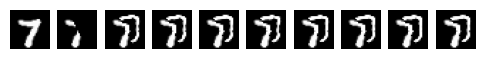

0 torch.Size([1, 1, 28, 28])
0 7147.8017578125
50 4485.2451171875


KeyboardInterrupt: 

In [1]:
from models.vae import *
from config import mnist_configs
from QAVI import Gaus_QAVI, Mix_QAVI, Flow_QAVI, Feat_QAVI
from data import *

#Load configs from MNIST
configs = mnist_configs()

#Load fully-observed training data
train_loader = dataset_loader()
print("training set loaded")

#Load pre-trained VAE, train with training data if not available
vae = load_baseVAE("mnist", configs, train_loader)

print("pre-trained VAE loaded")

#Load test loader for patches missing data
miss_string = "rotating_half"
print("test set (" + miss_string + ") loaded")

#Create gaus object for inference with a Gaussian posterior
'''
Using Feat QAVI
'''
test_data = dataset_loader(batch_size=1, miss_string=miss_string, mode="test")
feat = Feat_QAVI(configs, test_data)
feat.show_imputations(test_data, miss_string, feat_space=True)
feat.evaluate(test_data, miss_string, feat_space=True)

test_data = dataset_loader(batch_size=100, miss_string=miss_string, mode="test")


In [ ]:

'''
Using Gaussian posterior
'''
gaus = Gaus_QAVI(configs, test_data)
gaus.show_imputations(test_data, miss_string)
gaus.evaluate(test_data, miss_string)

In [ ]:
'''
Using Flow posterior
'''

flow = Flow_QAVI(configs, test_data)
flow.show_imputations(test_data, miss_string)
flow.evaluate(test_data, miss_string)



In [ ]:
'''
Using Mixture posterior
'''

mix = Mix_QAVI(configs, test_data)
mix.show_imputations(test_data, miss_string)
mix.evaluate(test_data, miss_string)

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from models.vae import *
from config import mnist_configs
from data import *

def show_images(b_data, b_mask=None):
	[batch_size, channels,p,q] = b_data.shape
	fig = plt.figure(figsize=(6, 6))
	# setting values to rows and column variables
	rows = 2 #n_images
	columns = 2 #K imputations
	if b_mask is not None: b_data[~b_mask] = 0.5

	for i in range(rows):
		for j in range(columns):
			fig.add_subplot(rows, columns, i*columns + j +1)
			# showing image
			a = np.squeeze(b_data[i*columns + j].cpu().data.numpy().reshape(1,1,28,28))

			plt.imshow(a, cmap='gray', vmin=0, vmax=1)         

	#if b_mask is None: plt.savefig("true.pdf")
	#else: plt.savefig("miss.pdf")

	plt.show()
	plt.close()
    
#Load configs from MNIST
configs = mnist_configs()

#Load fully-observed training data
train_loader = dataset_loader()
print("training set loaded")

#Load pre-trained VAE, train with training data if not available
vae = load_baseVAE("mnist", configs, train_loader)
miss_string = "random"
test_data = dataset_loader(batch_size=4, miss_string=miss_string, mode="test")

for i, data in enumerate(test_data): 
	b_data, b_mask, b_full = data[0:3]
	b_data = b_data.cuda().float()
	b_mask = b_mask.cuda().bool()
	b_full = b_full.cuda().float()
	show_images(b_data, b_mask)
	show_images(b_full)
	exit()

    